In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt


tweets_data_path = 'data/dilmahash.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)

358293


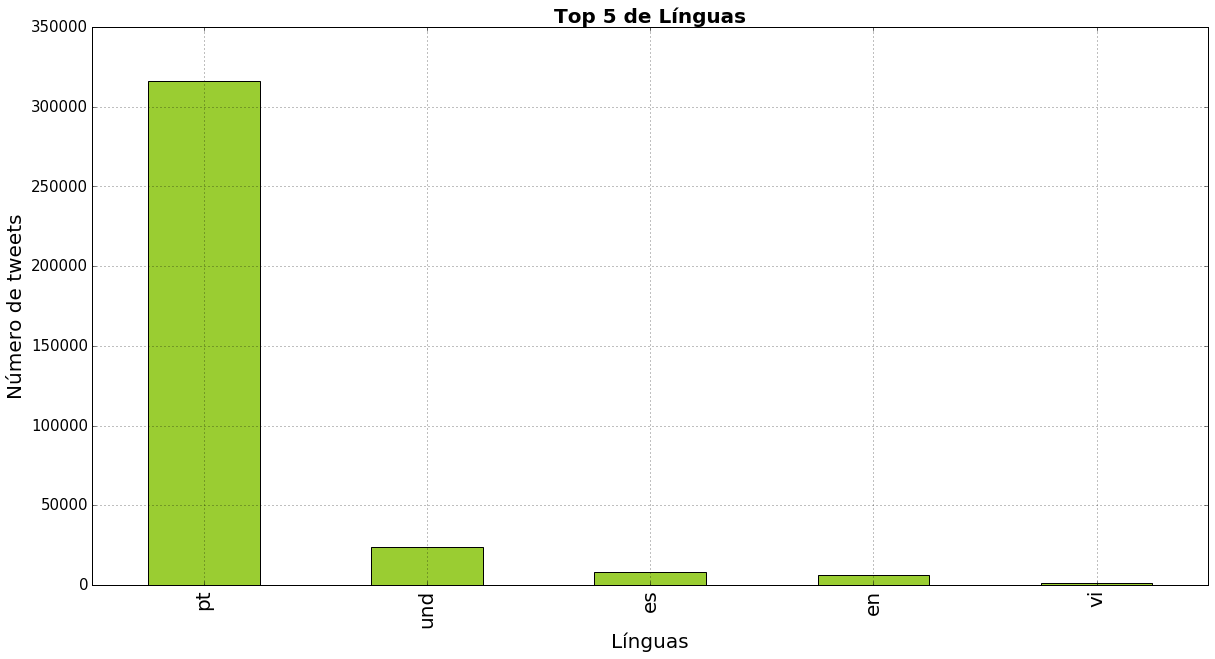

In [48]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 de Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='yellowgreen')
plt.grid()


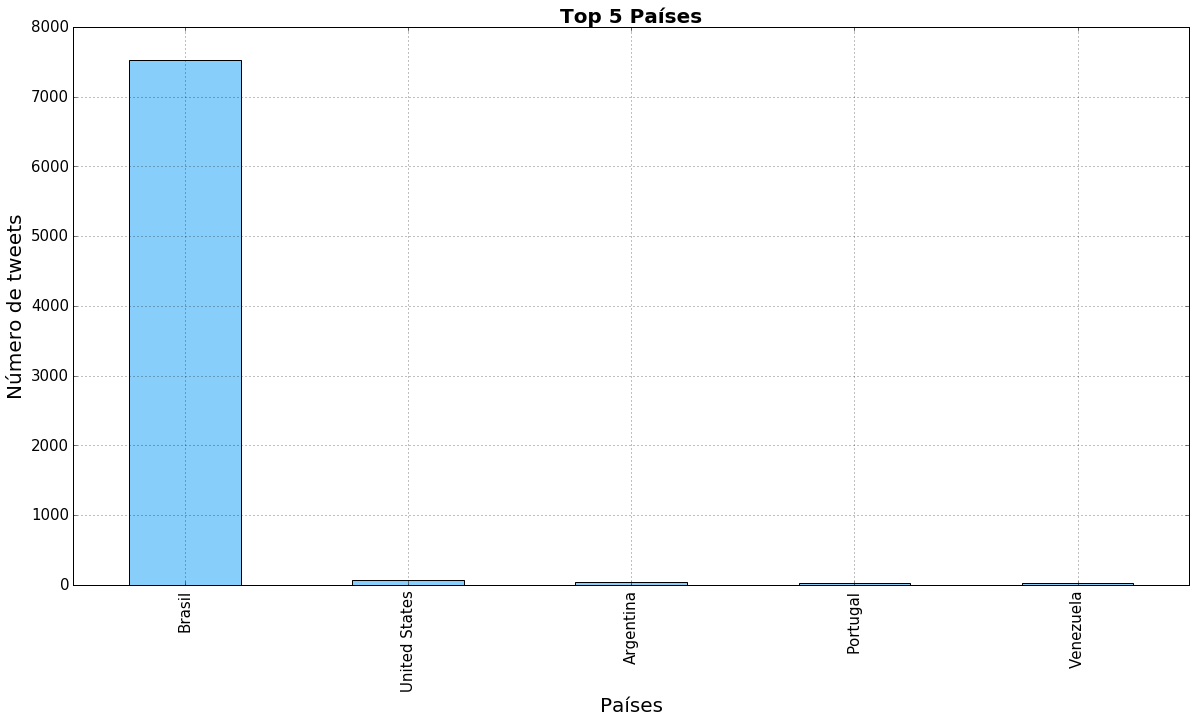

In [49]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

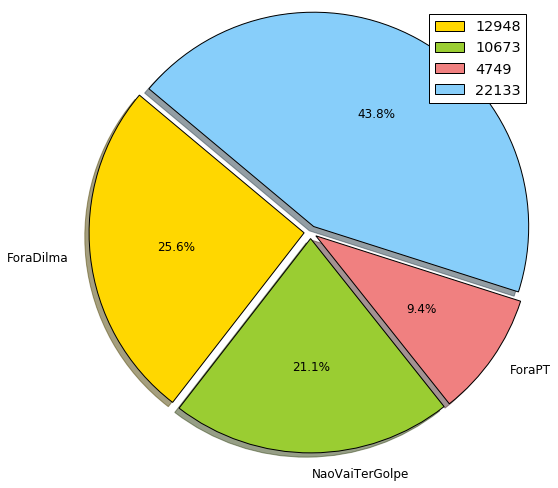

In [54]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['ForaPT'] = tweets['text'].apply(lambda tweet: word_in_text('ForaPT', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
tweets['Golpe'] = tweets['text'].apply(lambda tweet: word_in_text('Golpe', tweet))

# print tweets['ForaDilma'].value_counts()[True]
# print tweets['NaoVaiTerGolpe'].value_counts()[True]
# print tweets['ForaPT'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'ForaPT', 'Golpe']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['ForaPT'].value_counts()[True],
                      tweets['Golpe'].value_counts()[True]]

plt.subplots(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.03,0.03, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc="best")
plt.axis('equal')
plt.show()

In [ ]:
tweets['programming'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_in_text('tutorial', tweet))

tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('programming', tweet) 
                                          or word_in_text('tutorial', tweet))

print tweets['programming'].value_counts()[True]
print tweets['tutorial'].value_counts()[True]
print tweets['relevant'].value_counts()[True]

print tweets[tweets['relevant'] == True]['python'].value_counts()[True]
print tweets[tweets['relevant'] == True]['javascript'].value_counts()[True]
print tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]

tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['javascript'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)',
             fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [ ]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['javascript'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ruby'] == True]['link']